In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
import nltk

In [4]:
#nltk.download_shell()

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print('{0}: {1}'.format(mess_no, message))
    print()

0: ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1: ham	Ok lar... Joking wif u oni...

2: spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3: ham	U dun say so early hor... U c already then say...

4: ham	Nah I don't think he goes to usf, he lives around here though

5: spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6: ham	Even my brother is not like to speak with me. They treat me like aids patent.

7: ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8: spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim co

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', delimiter='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


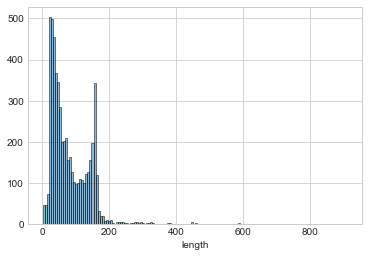

In [14]:
sns.distplot(messages['length'], kde=False, bins=150, hist_kws={'edgecolor':'black', 'alpha':0.5})

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

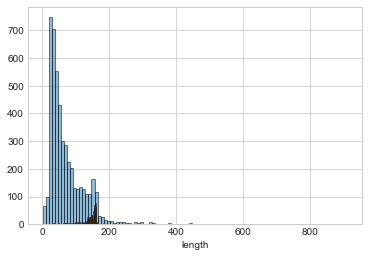

In [16]:
sns.distplot(messages[messages['label'] == 'ham']['length'], 
             kde=False, bins=100, hist_kws={'edgecolor':'black', 'alpha':0.5})

sns.distplot(messages[messages['label'] == 'spam']['length'], 
             kde=False, bins=100, hist_kws={'edgecolor':'black', 'alpha':0.5})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE08582828>,
      dtype=object)

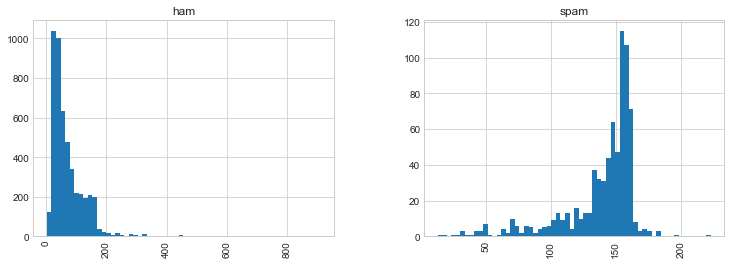

In [19]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [20]:
import string

In [21]:
mess = 'Sample message! Notice: it has punctuation.'

In [30]:
nopunc = [c for c in mess if c not in string.punctuation]

In [32]:
nopunc = ''.join(nopunc)

In [33]:
nopunc

'Sample message Notice it has punctuation'

In [34]:
from nltk.corpus import stopwords

In [29]:
 stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [47]:
clean_mess = [w for w in nopunc.split() if w.lower() not in  stopwords.words('english')]

In [48]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [60]:
def text_process(mess):  
    mess = [c for c in mess if c not in string.punctuation]
    mess = ''.join(mess)
    return [w for w in mess.split() if w.lower() not in  stopwords.words('english')]

In [61]:
text_process(mess)

['Sample', 'message', 'Notice', 'punctuation']

In [62]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [68]:
print(len(bow_transformer.vocabulary_))

11425


In [72]:
mess4 = messages['message'][3]

In [73]:
print(mess4)

U dun say so early hor... U c already then say...


In [74]:
bow4 = bow_transformer.transform([mess4])

In [75]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [76]:
print(bow4.shape)

(1, 11425)


In [78]:
bow_transformer.get_feature_names()[9554]

'say'

In [80]:
messages_bow = bow_transformer.transform(messages['message'])

In [81]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [82]:
messages_bow.nnz

50548

In [85]:
sparsity = (100.0 * messages_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity, 3)))

sparsity: 0.079


In [86]:
from sklearn.feature_extraction.text import TfidfTransformer

In [87]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [88]:
tfidf4 = tfidf_transformer.transform(bow4)

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [89]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [90]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [91]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [95]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [96]:
y_pred = spam_detect_model.predict(messages_tfidf)

In [97]:
y_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [100]:
from sklearn.pipeline import Pipeline

In [101]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [103]:
pipeline.fit(msg_train, label_train)

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001FE0B7D08C8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [105]:
msg_pred = pipeline.predict(msg_test)

C:\Users\Administrator\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [106]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(label_test, msg_pred))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1444
       spam       1.00      0.67      0.80       228

avg / total       0.96      0.96      0.95      1672

